In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import lightgbm as lgb
print(lgb.__version__)
import catboost as catb
# from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc
# from sklearn.metrics import roc_curve, roc_auc_score, auc


from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from cf_matrix import make_confusion_matrix
from sklearn.pipeline import Pipeline
from hyperopt.pyll.base import scope

import pickle
import warnings 
warnings.filterwarnings('ignore')



pd.set_option('display.max_columns', None)


4.1.0


In [89]:
#lgb_model = lgb.LGBMClassifier(random_state=42)


In [90]:
df=pd.read_csv('data_rev3.csv')
df.shape

(81315, 33)

In [91]:
df.isnull().sum()

order_day                    0
accept                       0
tos_flg                  71569
disconotice_flg              0
oam_activelogin_cnt          0
term_length                  0
called_numcalls_cnt          0
latefee_flg                  0
dwelling_type_cd             0
curr_usage                8349
product_type_cd              0
pool                     79626
automatic_payment_flg        0
weblog_flg                   0
risk_level               34733
deposit_onhand_amt       76315
ebill_enroll_flag            0
called_flg                   0
oam_flg                      0
sap_productname            208
numweblog_cnt                0
disconnects_flg              0
load_profile                 0
city                         0
zipcode                      0
home_value               60677
county                       0
tdsp                         0
dma                          0
ev_driver                    0
segment                      0
customer_id                  0
meter_id

In [92]:
df.columns

Index(['order_day', 'accept', 'tos_flg', 'disconotice_flg',
       'oam_activelogin_cnt', 'term_length', 'called_numcalls_cnt',
       'latefee_flg', 'dwelling_type_cd', 'curr_usage', 'product_type_cd',
       'pool', 'automatic_payment_flg', 'weblog_flg', 'risk_level',
       'deposit_onhand_amt', 'ebill_enroll_flag', 'called_flg', 'oam_flg',
       'sap_productname', 'numweblog_cnt', 'disconnects_flg', 'load_profile',
       'city', 'zipcode', 'home_value', 'county', 'tdsp', 'dma', 'ev_driver',
       'segment', 'customer_id', 'meter_id'],
      dtype='object')

In [93]:
df.order_day=pd.to_datetime(df.order_day,format='%d/%m/%Y')


In [94]:
df.head()

,order_day,accept,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,pool,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,home_value,county,tdsp,dma,ev_driver,segment,customer_id,meter_id
0,2017-01-01,0,NaN,N,0,0,0,N,M,188.0,MTM,NaN,N,N,M,NaN,Y,N,Y,Reliant Flex plan,0,N,R2,DALLAS,752405170,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,55843,11745
1,2017-01-01,0,NaN,N,0,19,0,N,M,167.0,TERM,NaN,N,N,H,NaN,N,N,N,Reliant Easy Look 19 plan,0,N,R1,HOUSTON,770649432,NaN,HARRIS,CNP,HOUSTON,N,5,17325,25319
2,2017-01-01,0,NaN,N,0,48,0,N,M,188.0,TERM,NaN,N,N,NaN,NaN,N,N,N,Reliant Easy Look 48 plan,0,N,R1,HOUSTON,77007,NaN,HARRIS,CNP,HOUSTON,N,11,20004,23202
3,2017-01-02,0,NaN,N,0,9,1,N,M,135.0,TERM,NaN,N,N,NaN,NaN,Y,Y,Y,Reliant Secure 9 plan,0,N,R2,HOUSTON,770822427,NaN,HARRIS,CNP,HOUSTON,N,11,55635,11475
4,2017-01-02,1,NaN,N,0,12,0,N,S,617.0,TERM,NaN,N,N,L,NaN,N,N,Y,Reliant Secure 12 plan,0,N,R1,DALLAS,752086271,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,49599,38365


In [95]:
# df['ID'] =df.customer_id.astype(str) + '_' + df['order_day'].astype(str)

In [96]:
# df=df.set_index('ID')

In [97]:
df.head()

,order_day,accept,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,pool,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,home_value,county,tdsp,dma,ev_driver,segment,customer_id,meter_id
0,2017-01-01,0,NaN,N,0,0,0,N,M,188.0,MTM,NaN,N,N,M,NaN,Y,N,Y,Reliant Flex plan,0,N,R2,DALLAS,752405170,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,55843,11745
1,2017-01-01,0,NaN,N,0,19,0,N,M,167.0,TERM,NaN,N,N,H,NaN,N,N,N,Reliant Easy Look 19 plan,0,N,R1,HOUSTON,770649432,NaN,HARRIS,CNP,HOUSTON,N,5,17325,25319
2,2017-01-01,0,NaN,N,0,48,0,N,M,188.0,TERM,NaN,N,N,NaN,NaN,N,N,N,Reliant Easy Look 48 plan,0,N,R1,HOUSTON,77007,NaN,HARRIS,CNP,HOUSTON,N,11,20004,23202
3,2017-01-02,0,NaN,N,0,9,1,N,M,135.0,TERM,NaN,N,N,NaN,NaN,Y,Y,Y,Reliant Secure 9 plan,0,N,R2,HOUSTON,770822427,NaN,HARRIS,CNP,HOUSTON,N,11,55635,11475
4,2017-01-02,1,NaN,N,0,12,0,N,S,617.0,TERM,NaN,N,N,L,NaN,N,N,Y,Reliant Secure 12 plan,0,N,R1,DALLAS,752086271,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,49599,38365


In [98]:
df.risk_level.mode().values[0]

'L'

In [99]:
## Drop home_value & Pool
## Frency encoding sap_prdocutname
## city, zipcoe, county,dma -- top 3 + others

## Sometimes a hybrid approach can be useful. For example, you might treat year as a numeric feature to capture linear trends over time, while treating day of the week and month as categorical to capture their cyclical nature.

## Date Features
df['OrderYear']=df.order_day.dt.year
df['OrderMonth']=df.order_day.dt.month
df['OrderDay']=df.order_day.dt.day
df['OrderDayOfYear']=df.order_day.dt.dayofyear
df['OrderDayOfWeek']=df.order_day.dt.dayofweek
df['IsWeekend'] = df['OrderDayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


## tos_flg
df.loc[df.tos_flg.isnull(),'tos_flg']='N'

## term_length
df['term_length'] = pd.to_numeric(df['term_length'], errors='coerce').fillna(0).astype(int)

## curr_usage
df['curr_usage'].fillna(0,inplace=True)

## risk_level (filling missing values by mode)
df.risk_level.fillna(df.risk_level.mode().values[0],inplace=True)

## sap_productname (filling missing values by mode)
df.sap_productname.fillna(df.sap_productname.mode().values[0],inplace=True)


## deposit_onhand_amt
df['deposit_onhand_amt'].fillna(0,inplace=True)

## Convert features to correct datatype
df['zipcode']=df['zipcode'].apply(str)
df['segment']=df['segment'].apply(str)
df['OrderMonth']=df['OrderMonth'].apply(str)
df['OrderDayOfWeek']=df['OrderDayOfWeek'].apply(str)




In [100]:
df.head()

,order_day,accept,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,pool,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,home_value,county,tdsp,dma,ev_driver,segment,customer_id,meter_id,OrderYear,OrderMonth,OrderDay,OrderDayOfYear,OrderDayOfWeek,IsWeekend
0,2017-01-01,0,N,N,0,0,0,N,M,188.0,MTM,NaN,N,N,M,0.0,Y,N,Y,Reliant Flex plan,0,N,R2,DALLAS,752405170,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,55843,11745,2017,1,1,1,6,1
1,2017-01-01,0,N,N,0,19,0,N,M,167.0,TERM,NaN,N,N,H,0.0,N,N,N,Reliant Easy Look 19 plan,0,N,R1,HOUSTON,770649432,NaN,HARRIS,CNP,HOUSTON,N,5,17325,25319,2017,1,1,1,6,1
2,2017-01-01,0,N,N,0,48,0,N,M,188.0,TERM,NaN,N,N,L,0.0,N,N,N,Reliant Easy Look 48 plan,0,N,R1,HOUSTON,77007,NaN,HARRIS,CNP,HOUSTON,N,11,20004,23202,2017,1,1,1,6,1
3,2017-01-02,0,N,N,0,9,1,N,M,135.0,TERM,NaN,N,N,L,0.0,Y,Y,Y,Reliant Secure 9 plan,0,N,R2,HOUSTON,770822427,NaN,HARRIS,CNP,HOUSTON,N,11,55635,11475,2017,1,2,2,0,0
4,2017-01-02,1,N,N,0,12,0,N,S,617.0,TERM,NaN,N,N,L,0.0,N,N,Y,Reliant Secure 12 plan,0,N,R1,DALLAS,752086271,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,49599,38365,2017,1,2,2,0,0


In [101]:
df.dtypes

order_day                datetime64[ns]
accept                            int64
tos_flg                          object
disconotice_flg                  object
oam_activelogin_cnt               int64
term_length                       int64
called_numcalls_cnt               int64
latefee_flg                      object
dwelling_type_cd                 object
curr_usage                      float64
product_type_cd                  object
pool                             object
automatic_payment_flg            object
weblog_flg                       object
risk_level                       object
deposit_onhand_amt              float64
ebill_enroll_flag                object
called_flg                       object
oam_flg                          object
sap_productname                  object
numweblog_cnt                     int64
disconnects_flg                  object
load_profile                     object
city                             object
zipcode                          object


In [102]:
ignore_cols=['accept','pool','home_value','meter_id','customer_id','order_day']
features=[i for i in df.columns if i not in ignore_cols]
print(features)

X=df[features]
y=df['accept']

['tos_flg', 'disconotice_flg', 'oam_activelogin_cnt', 'term_length', 'called_numcalls_cnt', 'latefee_flg', 'dwelling_type_cd', 'curr_usage', 'product_type_cd', 'automatic_payment_flg', 'weblog_flg', 'risk_level', 'deposit_onhand_amt', 'ebill_enroll_flag', 'called_flg', 'oam_flg', 'sap_productname', 'numweblog_cnt', 'disconnects_flg', 'load_profile', 'city', 'zipcode', 'county', 'tdsp', 'dma', 'ev_driver', 'segment', 'OrderYear', 'OrderMonth', 'OrderDay', 'OrderDayOfYear', 'OrderDayOfWeek', 'IsWeekend']


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y,shuffle=True, random_state=7)



In [104]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train.shape,y_train.shape))
#print('X_val Shape:{}--y_val Shape:{}'.format(X_val.shape,y_val.shape))
print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

X_train Shape:(65052, 33)--y_train Shape:(65052,)
X_test Shape:(16263, 33)--y_test Shape:(16263,)


In [105]:
y_train.value_counts(normalize=True)

0    0.831227
1    0.168773
Name: accept, dtype: float64

In [106]:
#y_val.value_counts(normalize=True)

In [107]:
y_test.value_counts(normalize=True)

0    0.831212
1    0.168788
Name: accept, dtype: float64

In [108]:
# df['ID']=df['customer_id'].apply(lambda x : str(x)) +'_'+df['meter_id'].apply(lambda x : str(x))+'_'+ df['order_day'].apply(lambda x : str(x))

In [109]:
X_test

,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,county,tdsp,dma,ev_driver,segment,OrderYear,OrderMonth,OrderDay,OrderDayOfYear,OrderDayOfWeek,IsWeekend
22630,N,N,0,12,0,N,M,472.0,TERM,Y,N,L,0.0,Y,N,Y,Reliant Secure 12 100 Wind plan,0,N,R1,HOUSTON,770244078,HARRIS,CNP,HOUSTON,N,11,2017,8,25,237,4,0
17439,N,N,0,12,0,N,M,0.0,TERM,N,N,L,0.0,N,N,N,Reliant Secure 12 plan,0,N,R2,HOUSTON,770991981,HARRIS,CNP,HOUSTON,N,3,2017,5,17,137,2,0
8440,N,N,0,12,1,N,S,0.0,TERM,N,N,L,0.0,N,Y,N,Reliant Secure 12 plan,0,N,R1,HARKER HEIGHTS,765482219,BELL,ONC,WACO-TEMPLE-BRYAN,N,6,2017,1,19,19,3,0
20339,N,N,0,12,0,N,M,0.0,TERM,N,N,L,0.0,Y,N,N,Reliant Flex plan,0,N,R2,HOUSTON,770304719,HARRIS,CNP,HOUSTON,N,11,2017,8,21,233,0,0
996,N,N,0,12,0,N,S,1160.0,TERM,N,N,L,0.0,N,N,N,Reliant Builder Power Plus 12 plan,0,N,R1,HOUSTON,77018,HARRIS,CNP,HOUSTON,N,9,2017,1,10,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51682,N,N,0,12,0,N,S,1083.0,TERM,Y,N,M,0.0,Y,N,Y,Reliant Secure Advantage 12 plan,0,N,R1,WICHITA FALLS,763024313,WICHITA,ONC,WICHITA FALLS & LAWTON,N,10,2018,12,20,354,3,0
60548,N,N,0,18,0,N,M,236.0,TERM,Y,N,L,0.0,Y,N,Y,Reliant Truly Free Weekends 18 plan,0,N,R1,HOUSTON,770141223,HARRIS,CNP,HOUSTON,N,3,2019,1,4,4,4,0
59795,N,N,0,0,0,Y,M,731.0,MTM,N,Y,L,0.0,Y,N,Y,Reliant Flex plan,5,N,R1,TYLER,757033747,SMITH,ONC,TYLER-LONGVIEW(LFKN&NCGD),N,3,2019,1,4,4,4,0
79980,N,N,0,0,0,N,S,963.0,MTM,Y,N,M,0.0,Y,N,Y,Reliant Flex plan,0,N,R1,PEARLAND,77584,BRAZORIA,CNP,HOUSTON,N,11,2020,11,30,335,0,0


In [110]:
X_train.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

## Feature Engineering

- sap_productname : Frequency or Count Encoding: Replace each category with its frequency (or count) in the dataset. 
- 'city', 'zipcode', 'county', dma : Only considering top 3 categories from these features and clubbing evrything else in 'other' category.


## sap_productname transfromation

In [111]:
sap_productname_frequency_map = X_train['sap_productname'].value_counts().to_dict()
# print(sap_productname_frequency_map)

In [112]:
# Save the mapping
with open('sap_productname_freq_map.json', 'w') as file:
    json.dump(sap_productname_frequency_map, file)

In [113]:
# Map frequencies to the categories in train, test, and validation sets
X_train['sap_productname'] = X_train['sap_productname'].map(sap_productname_frequency_map)
X_test['sap_productname'] = X_test['sap_productname'].map(sap_productname_frequency_map)
#X_val['sap_productname'] = X_val['sap_productname'].map(sap_productname_frequency_map)

# Handling missing values if any category in test/val is not present in train
X_test['sap_productname'].fillna(0, inplace=True)
#X_val['sap_productname'].fillna(0, inplace=True)


X_train['sap_productname'] = X_train['sap_productname'].astype(np.int64)
X_test['sap_productname'] = X_test['sap_productname'].astype(np.int64)
#X_val['sap_productname'] = X_val['sap_productname'].astype(np.int64)

In [114]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train.shape,y_train.shape))
#print('X_val Shape:{}--y_val Shape:{}'.format(X_val.shape,y_val.shape))
print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

X_train Shape:(65052, 33)--y_train Shape:(65052,)
X_test Shape:(16263, 33)--y_test Shape:(16263,)


In [115]:
# Identifying numerical and categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

ctgy_cols = X_train.select_dtypes(include=['object']).columns
print('num Columns: {} \n\nctgy columns: {}'.format(num_cols,ctgy_cols))

num Columns: Index(['oam_activelogin_cnt', 'term_length', 'called_numcalls_cnt',
       'curr_usage', 'deposit_onhand_amt', 'sap_productname', 'numweblog_cnt',
       'OrderYear', 'OrderDay', 'OrderDayOfYear', 'IsWeekend'],
      dtype='object') 

ctgy columns: Index(['tos_flg', 'disconotice_flg', 'latefee_flg', 'dwelling_type_cd',
       'product_type_cd', 'automatic_payment_flg', 'weblog_flg', 'risk_level',
       'ebill_enroll_flag', 'called_flg', 'oam_flg', 'disconnects_flg',
       'load_profile', 'city', 'zipcode', 'county', 'tdsp', 'dma', 'ev_driver',
       'segment', 'OrderMonth', 'OrderDayOfWeek'],
      dtype='object')


In [116]:
X_train.head()

,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,county,tdsp,dma,ev_driver,segment,OrderYear,OrderMonth,OrderDay,OrderDayOfYear,OrderDayOfWeek,IsWeekend
76413,N,N,0,0,0,N,S,217.0,MTM,N,N,L,75.0,N,N,N,12643,0,N,R2,MCKINNEY,750692660,COLLIN,ONC,DALLAS-FT. WORTH,N,4,2020,11,11,316,2,0
78324,N,N,0,20,0,N,S,1081.0,TERM,N,N,L,0.0,Y,N,Y,1347,0,N,R2,HUMBLE,773381628,HARRIS,CNP,HOUSTON,N,6,2020,11,19,324,3,0
69788,N,N,0,0,0,Y,M,352.0,MTM,N,N,L,0.0,Y,N,Y,12643,0,N,R1,HOUSTON,770494346,HARRIS,CNP,HOUSTON,N,3,2020,2,3,34,0,0
28001,N,N,0,24,0,N,S,1550.0,TERM,Y,N,L,0.0,Y,N,Y,62,0,N,R2,PEARLAND,775817107,BRAZORIA,CNP,HOUSTON,N,12,2017,9,5,248,1,0
46234,N,N,0,12,1,N,S,923.0,TERM,Y,N,L,0.0,Y,Y,Y,7143,0,N,R2,HOUSTON,77007,HARRIS,CNP,HOUSTON,N,9,2018,5,31,151,3,0


## Features with multiples categories only cosindering top 3 based on count remaining clubbed into'other' categiory

In [117]:
top_3_city = X_train['city'].value_counts().nlargest(3).index
top_3_zipcode = X_train['zipcode'].value_counts().nlargest(3).index
top_3_county = X_train['county'].value_counts().nlargest(3).index
top_3_dma = X_train['dma'].value_counts().nlargest(3).index


In [118]:
## city
X_train['city'] = X_train['city'].apply(lambda x: x if x in top_3_city else 'Other')
X_test['city'] = X_test['city'].apply(lambda x: x if x in top_3_city else 'Other')
#X_val['city'] = X_val['city'].apply(lambda x: x if x in top_3_city else 'Other')

## zipcode
X_train['zipcode'] = X_train['zipcode'].apply(lambda x: x if x in top_3_zipcode else 'Other')
X_test['zipcode'] = X_test['zipcode'].apply(lambda x: x if x in top_3_zipcode else 'Other')
#X_val['zipcode'] = X_val['zipcode'].apply(lambda x: x if x in top_3_zipcode else 'Other')

## county
X_train['county'] = X_train['county'].apply(lambda x: x if x in top_3_county else 'Other')
X_test['county'] = X_test['county'].apply(lambda x: x if x in top_3_county else 'Other')
#X_val['county'] = X_val['county'].apply(lambda x: x if x in top_3_county else 'Other')

## dma
X_train['dma'] = X_train['dma'].apply(lambda x: x if x in top_3_dma else 'Other')
X_test['dma'] = X_test['dma'].apply(lambda x: x if x in top_3_dma else 'Other')
#X_val['dma'] = X_val['dma'].apply(lambda x: x if x in top_3_dma else 'Other')

In [119]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train.shape,y_train.shape))
#print('X_val Shape:{}--y_val Shape:{}'.format(X_val.shape,y_val.shape))
print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

X_train Shape:(65052, 33)--y_train Shape:(65052,)
X_test Shape:(16263, 33)--y_test Shape:(16263,)


In [120]:
X_train.city.value_counts()

Other         38273
HOUSTON       19710
DALLAS         4361
FORT WORTH     2708
Name: city, dtype: int64

In [121]:
X_train.zipcode.value_counts()

Other    64510
77449      234
77469      158
77494      150
Name: zipcode, dtype: int64

In [122]:
top_categories = {
    'top_3_city': top_3_city.tolist(),
    'top_3_zipcode': top_3_zipcode.tolist(),
    'top_3_county': top_3_county.tolist(),
    'top_3_dma': top_3_dma.tolist()
}

## Saving for production
with open('top_categories.json', 'w') as file:
    json.dump(top_categories, file)

In [123]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train.shape,y_train.shape))
#print('X_val Shape:{}--y_val Shape:{}'.format(X_val.shape,y_val.shape))
print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

X_train Shape:(65052, 33)--y_train Shape:(65052,)
X_test Shape:(16263, 33)--y_test Shape:(16263,)


## Label Encoding --> One Hot Encoding for categorical features

In [124]:
# Function for Label Encoding multiple columns
def label_encode_multiple_columns(train, test, columns):
    encoders = {}
    for column in columns:
        # print('Issue column:{}'.format(column))
        le = LabelEncoder()
        # Fit on the train data and transform all datasets
        train[column] = le.fit_transform(train[column])
        test[column] = le.transform(test[column])
        #val[column] = le.transform(val[column])
        encoders[column] = le
    return encoders

# Function for One-Hot Encoding multiple columns
def one_hot_encode_multiple_columns(train, test, columns):
    #ohe = OneHotEncoder(handle_unknown='ignore', sparse=False,drop='first')
    ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
    ohe.fit(train[columns])

    # Transform and create DataFrame from the encoded arrays
    def transform_and_create_df(data, columns):
        encoded = ohe.transform(data[columns])
        encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(), index=data.index)
        return data.drop(columns, axis=1).join(encoded_df)

    return transform_and_create_df(train, columns), transform_and_create_df(test, columns)

# Assuming X_train, X_test, X_val are your datasets
# label_columns = ['tos_flg', 'disconotice_flg']
# one_hot_columns = ['tos_flg', 'disconotice_flg']

label_columns = ctgy_cols
one_hot_columns = ctgy_cols
# Apply Label Encoding and One-Hot Encoding
label_encoders = label_encode_multiple_columns(X_train, X_test, label_columns)


In [171]:
for col, le in label_encoders.items():
    with open(f'label_encoder_{col}.pkl', 'wb') as file:
        pickle.dump(le, file)

In [125]:
X_train_dt = X_train.copy()
X_test_dt = X_test.copy()

In [126]:
X_train, X_test = one_hot_encode_multiple_columns(X_train, X_test, one_hot_columns)

In [127]:
print('X_train Shape:{}--y_train Shape:{}'.format(X_train.shape,y_train.shape))
#print('X_val Shape:{}--y_val Shape:{}'.format(X_val.shape,y_val.shape))
print('X_test Shape:{}--y_test Shape:{}'.format(X_test.shape,y_test.shape))

X_train Shape:(65052, 95)--y_train Shape:(65052,)
X_test Shape:(16263, 95)--y_test Shape:(16263,)


In [128]:
X_train

,oam_activelogin_cnt,term_length,called_numcalls_cnt,curr_usage,deposit_onhand_amt,sap_productname,numweblog_cnt,OrderYear,OrderDay,OrderDayOfYear,IsWeekend,tos_flg_0,tos_flg_1,disconotice_flg_0,disconotice_flg_1,latefee_flg_0,latefee_flg_1,dwelling_type_cd_0,dwelling_type_cd_1,product_type_cd_0,product_type_cd_1,automatic_payment_flg_0,automatic_payment_flg_1,weblog_flg_0,weblog_flg_1,risk_level_0,risk_level_1,risk_level_2,ebill_enroll_flag_0,ebill_enroll_flag_1,called_flg_0,called_flg_1,oam_flg_0,oam_flg_1,disconnects_flg_0,disconnects_flg_1,load_profile_0,load_profile_1,load_profile_2,load_profile_3,load_profile_4,city_0,city_1,city_2,city_3,zipcode_0,zipcode_1,zipcode_2,zipcode_3,county_0,county_1,county_2,county_3,tdsp_0,tdsp_1,tdsp_2,tdsp_3,tdsp_4,dma_0,dma_1,dma_2,dma_3,ev_driver_0,ev_driver_1,segment_0,segment_1,segment_2,segment_3,segment_4,segment_5,segment_6,segment_7,segment_8,segment_9,segment_10,segment_11,OrderMonth_0,OrderMonth_1,OrderMonth_2,OrderMonth_3,OrderMonth_4,OrderMonth_5,OrderMonth_6,OrderMonth_7,OrderMonth_8,OrderMonth_9,OrderMonth_10,OrderMonth_11,OrderDayOfWeek_0,OrderDayOfWeek_1,OrderDayOfWeek_2,OrderDayOfWeek_3,OrderDayOfWeek_4,OrderDayOfWeek_5,OrderDayOfWeek_6
76413,0,0,0,217.0,75.0,12643,0,2020,11,316,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
78324,0,20,0,1081.0,0.0,1347,0,2020,19,324,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69788,0,0,0,352.0,0.0,12643,0,2020,3,34,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28001,0,24,0,1550.0,0.0,62,0,2017,5,248,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
46234,0,12,1,923.0,0.0,7143,0,2018,31,151,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72398,0,0,1,1058.0,0.0,1650,0,2020,26,239,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4998,0,12,0,868.0,0.0,7143,0,2017,13,13,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0

In [129]:
X_train[num_cols]

,oam_activelogin_cnt,term_length,called_numcalls_cnt,curr_usage,deposit_onhand_amt,sap_productname,numweblog_cnt,OrderYear,OrderDay,OrderDayOfYear,IsWeekend
76413,0,0,0,217.0,75.0,12643,0,2020,11,316,0
78324,0,20,0,1081.0,0.0,1347,0,2020,19,324,0
69788,0,0,0,352.0,0.0,12643,0,2020,3,34,0
28001,0,24,0,1550.0,0.0,62,0,2017,5,248,0
46234,0,12,1,923.0,0.0,7143,0,2018,31,151,0
...,...,...,...,...,...,...,...,...,...,...,...
72398,0,0,1,1058.0,0.0,1650,0,2020,26,239,0
4998,0,12,0,868.0,0.0,7143,0,2017,13,13,0
66265,0,16,0,1052.0,0.0,110,1,2019,5,64,0
63985,0,16,0,1086.0,0.0,110,0,2019,5,5,1


## Numerical Preprocessing

In [130]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train[num_cols])

# Transform the test and validation data using the same scaler
X_test_scaled = scaler.transform(X_test[num_cols])
#X_val_scaled = scaler.transform(X_val[num_cols])

In [131]:
X_train_scaled =pd.DataFrame(X_train_scaled,columns=num_cols,index=X_train.index)
X_test_scaled =pd.DataFrame(X_test_scaled,columns=num_cols,index=X_test.index)
#X_val_scaled =pd.DataFrame(X_val_scaled,columns=num_cols,index=X_val.index)

In [132]:
X_train_scaled

,oam_activelogin_cnt,term_length,called_numcalls_cnt,curr_usage,deposit_onhand_amt,sap_productname,numweblog_cnt,OrderYear,OrderDay,OrderDayOfYear,IsWeekend
76413,0.0,0.000000,0.000000,0.055531,0.042857,1.000000,0.000000,1.000000,0.333333,0.865385,0.0
78324,0.0,0.202020,0.000000,0.120366,0.000000,0.106470,0.000000,1.000000,0.600000,0.887363,0.0
69788,0.0,0.000000,0.000000,0.065661,0.000000,1.000000,0.000000,1.000000,0.066667,0.090659,0.0
28001,0.0,0.242424,0.000000,0.155561,0.000000,0.004825,0.000000,0.000000,0.133333,0.678571,0.0
46234,0.0,0.121212,0.043478,0.108510,0.000000,0.564942,0.000000,0.333333,1.000000,0.412088,0.0
...,...,...,...,...,...,...,...,...,...,...,...
72398,0.0,0.000000,0.043478,0.118640,0.000000,0.130438,0.000000,1.000000,0.833333,0.653846,0.0
4998,0.0,0.121212,0.000000,0.104382,0.000000,0.564942,0.000000,0.000000,0.400000,0.032967,0.0
66265,0.0,0.161616,0.000000,0.118190,0.000000,0.008622,0.014085,0.666667,0.133333,0.173077,0.0
63985,0.0,0.161616,0.000000,0.120741,0.000000,0.008622,0.000000,0.666667,0.133333,0.010989,1.0


In [133]:
X_train.drop(num_cols,axis=1,inplace=True)
X_test.drop(num_cols,axis=1,inplace=True)

X_train_dt.drop(num_cols,axis=1,inplace=True)
X_test_dt.drop(num_cols,axis=1,inplace=True)
#X_val.drop(num_cols,axis=1,inplace=True)

In [134]:
X_train_ohe=X_train_scaled.join(X_train)
X_test_ohe=X_train_scaled.join(X_test)

X_train_dt=X_train_scaled.join(X_train_dt)
X_test_dt=X_test_scaled.join(X_test_dt)
#X_val=X_train_scaled.join(X_val)

In [135]:
X_train_ohe.shape

(65052, 95)

In [136]:
X_train_ohe.head()

,oam_activelogin_cnt,term_length,called_numcalls_cnt,curr_usage,deposit_onhand_amt,sap_productname,numweblog_cnt,OrderYear,OrderDay,OrderDayOfYear,IsWeekend,tos_flg_0,tos_flg_1,disconotice_flg_0,disconotice_flg_1,latefee_flg_0,latefee_flg_1,dwelling_type_cd_0,dwelling_type_cd_1,product_type_cd_0,product_type_cd_1,automatic_payment_flg_0,automatic_payment_flg_1,weblog_flg_0,weblog_flg_1,risk_level_0,risk_level_1,risk_level_2,ebill_enroll_flag_0,ebill_enroll_flag_1,called_flg_0,called_flg_1,oam_flg_0,oam_flg_1,disconnects_flg_0,disconnects_flg_1,load_profile_0,load_profile_1,load_profile_2,load_profile_3,load_profile_4,city_0,city_1,city_2,city_3,zipcode_0,zipcode_1,zipcode_2,zipcode_3,county_0,county_1,county_2,county_3,tdsp_0,tdsp_1,tdsp_2,tdsp_3,tdsp_4,dma_0,dma_1,dma_2,dma_3,ev_driver_0,ev_driver_1,segment_0,segment_1,segment_2,segment_3,segment_4,segment_5,segment_6,segment_7,segment_8,segment_9,segment_10,segment_11,OrderMonth_0,OrderMonth_1,OrderMonth_2,OrderMonth_3,OrderMonth_4,OrderMonth_5,OrderMonth_6,OrderMonth_7,OrderMonth_8,OrderMonth_9,OrderMonth_10,OrderMonth_11,OrderDayOfWeek_0,OrderDayOfWeek_1,OrderDayOfWeek_2,OrderDayOfWeek_3,OrderDayOfWeek_4,OrderDayOfWeek_5,OrderDayOfWeek_6
76413,0.0,0.000000,0.000000,0.055531,0.042857,1.000000,0.0,1.000000,0.333333,0.865385,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
78324,0.0,0.202020,0.000000,0.120366,0.000000,0.106470,0.0,1.000000,0.600000,0.887363,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69788,0.0,0.000000,0.000000,0.065661,0.000000,1.000000,0.0,1.000000,0.066667,0.090659,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28001,0.0,0.242424,0.000000,0.155561,0.000000,0.004825,0.0,0.000000,0.133333,0.678571,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
46234,0.0,0.121212,0.043478,0.108510,0.000000,0.564942,0.0,0.333333,1.000000,0.412088,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [137]:
X_train_dt.shape

(65052, 33)

In [138]:
X_test_dt.shape

(16263, 33)

In [139]:
X_train_dt.head()

,oam_activelogin_cnt,term_length,called_numcalls_cnt,curr_usage,deposit_onhand_amt,sap_productname,numweblog_cnt,OrderYear,OrderDay,OrderDayOfYear,IsWeekend,tos_flg,disconotice_flg,latefee_flg,dwelling_type_cd,product_type_cd,automatic_payment_flg,weblog_flg,risk_level,ebill_enroll_flag,called_flg,oam_flg,disconnects_flg,load_profile,city,zipcode,county,tdsp,dma,ev_driver,segment,OrderMonth,OrderDayOfWeek
76413,0.0,0.000000,0.000000,0.055531,0.042857,1.000000,0.0,1.000000,0.333333,0.865385,0.0,0,0,0,1,0,0,0,1,0,0,0,0,3,3,3,2,2,0,0,6,2,2
78324,0.0,0.202020,0.000000,0.120366,0.000000,0.106470,0.0,1.000000,0.600000,0.887363,0.0,0,0,0,1,1,0,0,1,1,0,1,0,3,3,3,1,0,1,0,8,2,3
69788,0.0,0.000000,0.000000,0.065661,0.000000,1.000000,0.0,1.000000,0.066667,0.090659,0.0,0,0,1,0,0,0,0,1,1,0,1,0,1,2,3,1,0,1,0,5,4,0
28001,0.0,0.242424,0.000000,0.155561,0.000000,0.004825,0.0,0.000000,0.133333,0.678571,0.0,0,0,0,1,1,1,0,1,1,0,1,0,3,3,3,2,0,1,0,3,11,1
46234,0.0,0.121212,0.043478,0.108510,0.000000,0.564942,0.0,0.333333,1.000000,0.412088,0.0,0,0,0,1,1,1,0,1,1,1,1,0,3,2,3,1,0,1,0,11,7,3


## Modelling

### Logistic Regression


In [53]:

%%time
clf_logistic = LogisticRegression()

metrics = ['accuracy', 'neg_log_loss','roc_auc','f1','precision', 'recall',]
scores = cross_validate(clf_logistic, X_train_ohe, y_train, cv = 5, scoring = metrics)
print('Accuracy: {}\nLogLoss: {}\nAUC: {}\nF1: {}'.\
      format(np.round(scores['test_accuracy'].mean(),2),\
             np.round(scores['test_neg_log_loss'].mean(),2),\
             np.round(scores['test_roc_auc'].mean(),2),\
             np.round(scores['test_f1'].mean(),2)))

LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision'].mean()
LR_recall = scores['test_recall'].mean()
LR_f1 = scores['test_f1'].mean()
LR_roc = scores['test_roc_auc'].mean()
LR_neg_log_loss = scores['test_neg_log_loss'].mean()

Accuracy: 0.86
LogLoss: -0.29
AUC: 0.89
F1: 0.52
CPU times: user 35.1 s, sys: 3.14 s, total: 38.2 s
Wall time: 5.87 s


### Naive bayes

In [54]:
%%time

clf_nb = GaussianNB()



# metrics = ['accuracy', 'neg_log_loss','roc_auc','f1','precision', 'recall',]
scores = cross_validate(clf_nb, X_train_ohe, y_train, cv = 5, scoring = metrics)
print('Accuracy: {}\nLogLoss: {}\nAUC: {}\nF1: {}'.\
      format(np.round(scores['test_accuracy'].mean(),2),\
             np.round(scores['test_neg_log_loss'].mean(),2),\
             np.round(scores['test_roc_auc'].mean(),2),\
             np.round(scores['test_f1'].mean(),2)))
NB_fit_time = scores['fit_time'].mean()
NB_score_time = scores['score_time'].mean()
NB_accuracy = scores['test_accuracy'].mean()
NB_precision = scores['test_precision'].mean()
NB_recall = scores['test_recall'].mean()
NB_f1 = scores['test_f1'].mean()
NB_roc = scores['test_roc_auc'].mean()
NB_neg_log_loss = scores['test_neg_log_loss'].mean()

Accuracy: 0.6
LogLoss: -4.49
AUC: 0.81
F1: 0.43
CPU times: user 277 ms, sys: 75.4 ms, total: 352 ms
Wall time: 353 ms


### SVM

In [55]:
%%time

clf_svm = SVC(probability = True)

# # Cross Validation - Scoring = 'accuracy'
# result = cross_val_score(clf_svm, X_train, y_train, cv = 5, scoring = 'accuracy')
# print("Accuracy Mean:{}--Std: {}".format(round(result.mean(),3) ,round(result.std(),3)))

# result = cross_val_score(clf_svm, X_train, y_train, cv = 5, scoring = 'neg_log_loss')
# print("Log Loss Mean:{}--Std: {}".format(round(result.mean(),3) ,round(result.std(),3)))

scores = cross_validate(clf_svm, X_train_ohe[:10000], y_train[:10000], cv = 5, scoring = metrics)
print('Accuracy: {}\nLogLoss: {}\nAUC: {}\nF1: {}'.\
      format(np.round(scores['test_accuracy'].mean(),2),\
             np.round(scores['test_neg_log_loss'].mean(),2),\
             np.round(scores['test_roc_auc'].mean(),2),\
             np.round(scores['test_f1'].mean(),2)))
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision'].mean()
SVM_recall = scores['test_recall'].mean()
SVM_f1 = scores['test_f1'].mean()
SVM_roc = scores['test_roc_auc'].mean()
SVM_neg_log_loss = scores['test_neg_log_loss'].mean()

Accuracy: 0.85
LogLoss: -0.32
AUC: 0.88
F1: 0.39
CPU times: user 45.3 s, sys: 323 ms, total: 45.6 s
Wall time: 45.6 s


### Random Forest

In [56]:
%%time
clf_rf = RandomForestClassifier()


# metrics = ['accuracy', 'neg_log_loss','roc_auc','f1']
scores = cross_validate(clf_rf, X_train_dt, y_train, cv = 5, scoring = metrics)
print('Accuracy: {}\nLogLoss: {}\nAUC: {}\nF1: {}'.\
      format(np.round(scores['test_accuracy'].mean(),2),\
             np.round(scores['test_neg_log_loss'].mean(),2),\
             np.round(scores['test_roc_auc'].mean(),2),\
             np.round(scores['test_f1'].mean(),2)))
RF_fit_time = scores['fit_time'].mean()
RF_score_time = scores['score_time'].mean()
RF_accuracy = scores['test_accuracy'].mean()
RF_precision = scores['test_precision'].mean()
RF_recall = scores['test_recall'].mean()
RF_f1 = scores['test_f1'].mean()
RF_roc = scores['test_roc_auc'].mean()
RF_neg_log_loss = scores['test_neg_log_loss'].mean()

Accuracy: 0.89
LogLoss: -0.22
AUC: 0.95
F1: 0.67
CPU times: user 16 s, sys: 166 ms, total: 16.2 s
Wall time: 16.2 s


### XgBoost

In [57]:
%%time

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# metrics = ['accuracy', 'neg_log_loss','roc_auc','f1']
scores = cross_validate(xgb_model, X_train_dt, y_train, cv = 5, scoring = metrics)
print('Accuracy: {}\nLogLoss: {}\nAUC: {}\nF1: {}'.\
      format(np.round(scores['test_accuracy'].mean(),2),\
             np.round(scores['test_neg_log_loss'].mean(),2),\
             np.round(scores['test_roc_auc'].mean(),2),\
             np.round(scores['test_f1'].mean(),2)))

XGB_fit_time = scores['fit_time'].mean()
XGB_score_time = scores['score_time'].mean()
XGB_accuracy = scores['test_accuracy'].mean()
XGB_precision = scores['test_precision'].mean()
XGB_recall = scores['test_recall'].mean()
XGB_f1 = scores['test_f1'].mean()
XGB_roc = scores['test_roc_auc'].mean()
XGB_neg_log_loss = scores['test_neg_log_loss'].mean()

Accuracy: 0.89
LogLoss: -0.21
AUC: 0.95
F1: 0.69
CPU times: user 60 s, sys: 11.2 s, total: 1min 11s
Wall time: 10.1 s


### LightGBM

In [50]:
# lgb_model = lgb.LGBMClassifier(random_state=42)

In [ ]:
# scores = cross_validate(lgb_model, X_train, y_train, cv = 5, scoring = metrics)


In [ ]:
## 

In [62]:
# %%time

# lgb_model = lgb.LGBMClassifier(random_state=42)

# # metrics = ['accuracy', 'neg_log_loss','roc_auc','f1']
# scores = cross_validate(lgb_model, X_train, y_train, cv = 5, scoring = metrics)
# print('Accuracy: {}\nLogLoss: {}\nAUC: {}\nF1: {}'.\
#       format(np.round(scores['test_accuracy'].mean(),2),\
#              np.round(scores['test_neg_log_loss'].mean(),2),\
#              np.round(scores['test_roc_auc'].mean(),2),\
#              np.round(scores['test_f1'].mean(),2)))

# LGB_fit_time = scores['fit_time'].mean()
# LGB_score_time = scores['score_time'].mean()
# LGB_accuracy = scores['test_accuracy'].mean()
# LGB_precision = scores['test_precision'].mean()
# LGB_recall = scores['test_recall'].mean()
# LGB_f1 = scores['test_f1'].mean()
# LGB_roc = scores['test_roc_auc'].mean()
# LGB_neg_log_loss = scores['test_neg_log_loss'].mean()

### CatBoost

In [58]:
%%time

catb_model = catb.CatBoostClassifier(iterations=5, 
    learning_rate=0.1, )

# metrics = ['accuracy', 'neg_log_loss','roc_auc','f1']
scores = cross_validate(catb_model, X_train_dt, y_train, cv = 5, scoring = metrics)
print('Accuracy: {}\nLogLoss: {}\nAUC: {}\nF1: {}'.\
      format(np.round(scores['test_accuracy'].mean(),2),\
             np.round(scores['test_neg_log_loss'].mean(),2),\
             np.round(scores['test_roc_auc'].mean(),2),\
             np.round(scores['test_f1'].mean(),2)))

CATB_fit_time = scores['fit_time'].mean()
CATB_score_time = scores['score_time'].mean()
CATB_accuracy = scores['test_accuracy'].mean()
CATB_precision = scores['test_precision'].mean()
CATB_recall = scores['test_recall'].mean()
CATB_f1 = scores['test_f1'].mean()
CATB_roc = scores['test_roc_auc'].mean()
CATB_neg_log_loss = scores['test_neg_log_loss'].mean()

0:	learn: 0.5718730	total: 62.3ms	remaining: 249ms
1:	learn: 0.4745859	total: 70.5ms	remaining: 106ms
2:	learn: 0.4283095	total: 78.3ms	remaining: 52.2ms
3:	learn: 0.3993397	total: 85.8ms	remaining: 21.4ms
4:	learn: 0.3675021	total: 94.1ms	remaining: 0us
0:	learn: 0.5756591	total: 6.27ms	remaining: 25.1ms
1:	learn: 0.4770200	total: 13.5ms	remaining: 20.3ms
2:	learn: 0.4293899	total: 21.1ms	remaining: 14.1ms
3:	learn: 0.3978502	total: 28.4ms	remaining: 7.11ms
4:	learn: 0.3673163	total: 35.5ms	remaining: 0us
0:	learn: 0.5710750	total: 5.5ms	remaining: 22ms
1:	learn: 0.4737819	total: 13.5ms	remaining: 20.3ms
2:	learn: 0.4272704	total: 21.2ms	remaining: 14.1ms
3:	learn: 0.3959193	total: 29.9ms	remaining: 7.48ms
4:	learn: 0.3671245	total: 36.4ms	remaining: 0us
0:	learn: 0.5715318	total: 7.11ms	remaining: 28.4ms
1:	learn: 0.4739284	total: 13.9ms	remaining: 20.8ms
2:	learn: 0.4277628	total: 21.3ms	remaining: 14.2ms
3:	learn: 0.3964801	total: 28.4ms	remaining: 7.09ms
4:	learn: 0.3655153	total:

In [61]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Naive Bayes','Support Vector Machine','Random Forest', 'XGBoost', 'CatBoost'],
    'Fitting time': [LR_fit_time, NB_fit_time, SVM_fit_time,RF_fit_time, XGB_fit_time,CATB_fit_time],
    'Scoring time': [LR_score_time, NB_score_time,SVM_score_time, RF_score_time, XGB_score_time,CATB_score_time,],
    'Accuracy'    : [LR_accuracy, NB_accuracy,SVM_accuracy, RF_accuracy, XGB_accuracy,CATB_accuracy],
    'Precision'   : [LR_precision, NB_precision,SVM_precision, RF_precision, XGB_precision,CATB_precision],
    'Recall'      : [LR_recall, NB_recall,SVM_recall, RF_recall, XGB_recall,CATB_recall,],
    'F1_score'    : [LR_f1, NB_f1,SVM_f1,  RF_f1, XGB_f1,CATB_f1],
    'AUC_ROC'     : [LR_roc, NB_roc,SVM_roc, RF_roc, XGB_roc,CATB_roc],
    'LogLoss'     : [LR_neg_log_loss, NB_neg_log_loss,SVM_neg_log_loss, RF_neg_log_loss, XGB_neg_log_loss,CATB_neg_log_loss],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC','LogLoss'])

models_initial.sort_values(by='LogLoss', ascending=False).reset_index(drop=True)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC,LogLoss
0,XGBoost,1.980586,0.026069,0.894115,0.678215,0.708990,0.693259,0.945937,-0.214318
1,Random Forest,2.928390,0.297915,0.893301,0.697256,0.649969,0.672763,0.946368,-0.221187
2,Logistic Regression,1.136603,0.032324,0.856499,0.599234,0.452229,0.515405,0.892615,-0.294153
3,Support Vector Machine,7.369229,1.749462,0.853500,0.634180,0.278916,0.385964,0.877718,-0.316818
4,CatBoost,0.068161,0.017476,0.873978,0.703335,0.438020,0.539779,0.918669,-0.365342
5,Naive Bayes,0.043096,0.024027,0.595723,0.282392,0.904819,0.430418,0.812882,-4.493576


In [176]:
models_initial.sort_values(by='LogLoss', ascending=False,inplace=True)

In [177]:
models_initial.to_csv('ModelResults.csv',index=False,encoding='utf-8')

## Hyperparameter Tuning

In [65]:
space={'clf__max_depth': scope.int(hp.quniform("clf__max_depth", 3, 18, 1)),
        'clf__gamma': hp.uniform ('clf__gamma', 1,9),
        'clf__reg_alpha' : hp.quniform('clf__reg_alpha', 40,180,1),
        'clf__reg_lambda' : hp.uniform('clf__reg_lambda', 0,1),
        'clf__colsample_bytree' : hp.uniform('clf__colsample_bytree', 0.5,1),
        'clf__min_child_weight' : hp.quniform('clf__min_child_weight', 0, 10, 1),
        'clf__n_estimators': scope.int(hp.quniform('clf__n_estimators',200, 1000, 50))    }

In [76]:
clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

pipe = Pipeline([
        ('clf', clf)])

def objective(params):
    pipe.set_params(**params)
    print(params)
    score = cross_val_score(pipe, X_train_dt, y_train, cv=3, scoring='roc_auc', n_jobs=-1)
    print (score)
    loss_val= - np.abs(score.mean())
    print ("Loss:", loss_val)
    return {'loss': loss_val,'params':params, 'status': STATUS_OK }

In [77]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals =50,
                        trials = trials)
best_hyperparams

{'clf__colsample_bytree': 0.5145746048855755, 'clf__gamma': 2.4889919442149893, 'clf__max_depth': 9, 'clf__min_child_weight': 3.0, 'clf__n_estimators': 850, 'clf__reg_alpha': 94.0, 'clf__reg_lambda': 0.898483448013549}
[0.93666667 0.93979911 0.9381753 ]                                              
Loss:                                                                           
-0.9382136922918672                                                             
{'clf__colsample_bytree': 0.624548855231083, 'clf__gamma': 1.6037240498814525, 'clf__max_depth': 7, 'clf__min_child_weight': 1.0, 'clf__n_estimators': 850, 'clf__reg_alpha': 94.0, 'clf__reg_lambda': 0.9884495859033852}
[0.93670912 0.93989705 0.93708475]                                              
Loss:                                                                           
-0.9378969753873133                                                             
{'clf__colsample_bytree': 0.6234923971869767, 'clf__gamma': 4.52184147999276

{'clf__colsample_bytree': 0.7817860996446101,
 'clf__gamma': 1.00595371135923,
 'clf__max_depth': 13.0,
 'clf__min_child_weight': 7.0,
 'clf__n_estimators': 600.0,
 'clf__reg_alpha': 40.0,
 'clf__reg_lambda': 0.3271306964178847}

## Final Model

In [78]:
final_model = xgb.XGBClassifier(colsample_bytree= 0.7817860996446101,
 gamma=1.00595371135923,
 max_depth= 13,
 min_child_weight= 7,
 reg_alpha=40,
 reg_lambda=0.3271306964178847,
 objective='binary:logistic',
n_estimators=600)

In [80]:
%%time
final_model.fit(X_train_dt, y_train)


CPU times: user 23.2 s, sys: 5.11 s, total: 28.3 s
Wall time: 4.14 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7817860996446101, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.00595371135923, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=13,
              max_leaves=None, min_child_weight=7, missing=nan,
              monotone_constraints=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [140]:
y_pred=final_model.predict(X_test_dt)


In [141]:
y_pred.shape

(16263,)

In [142]:
roc_auc_score(y_test,y_pred)


0.8122281402574345

In [143]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[12647,   871],
       [  854,  1891]])

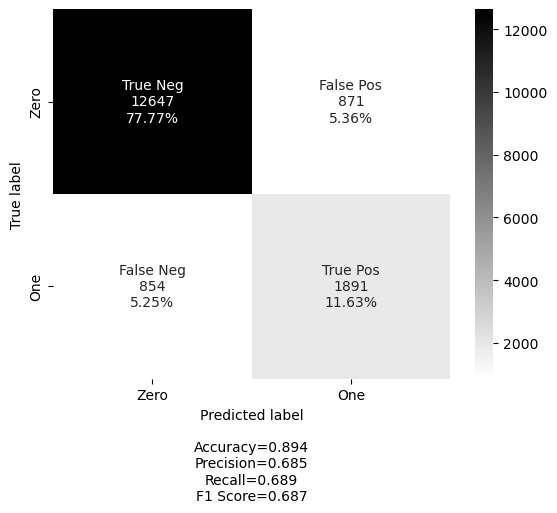

In [144]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [147]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

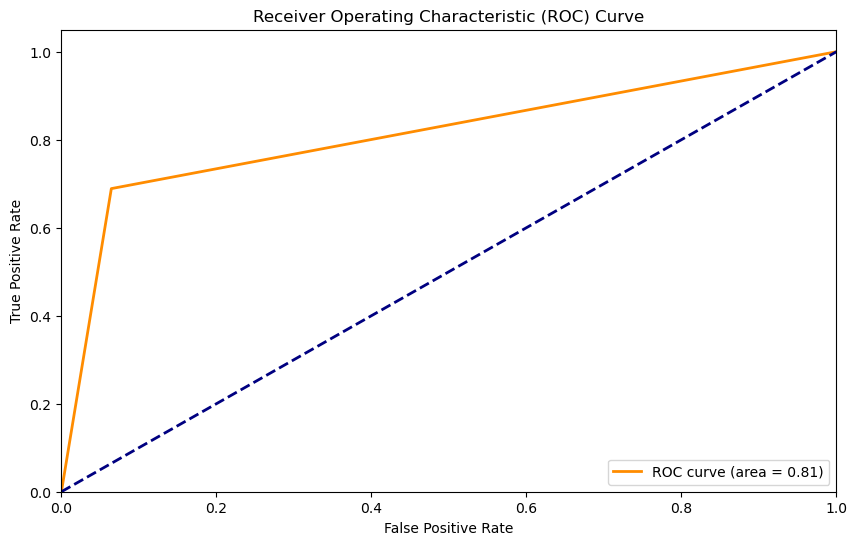

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


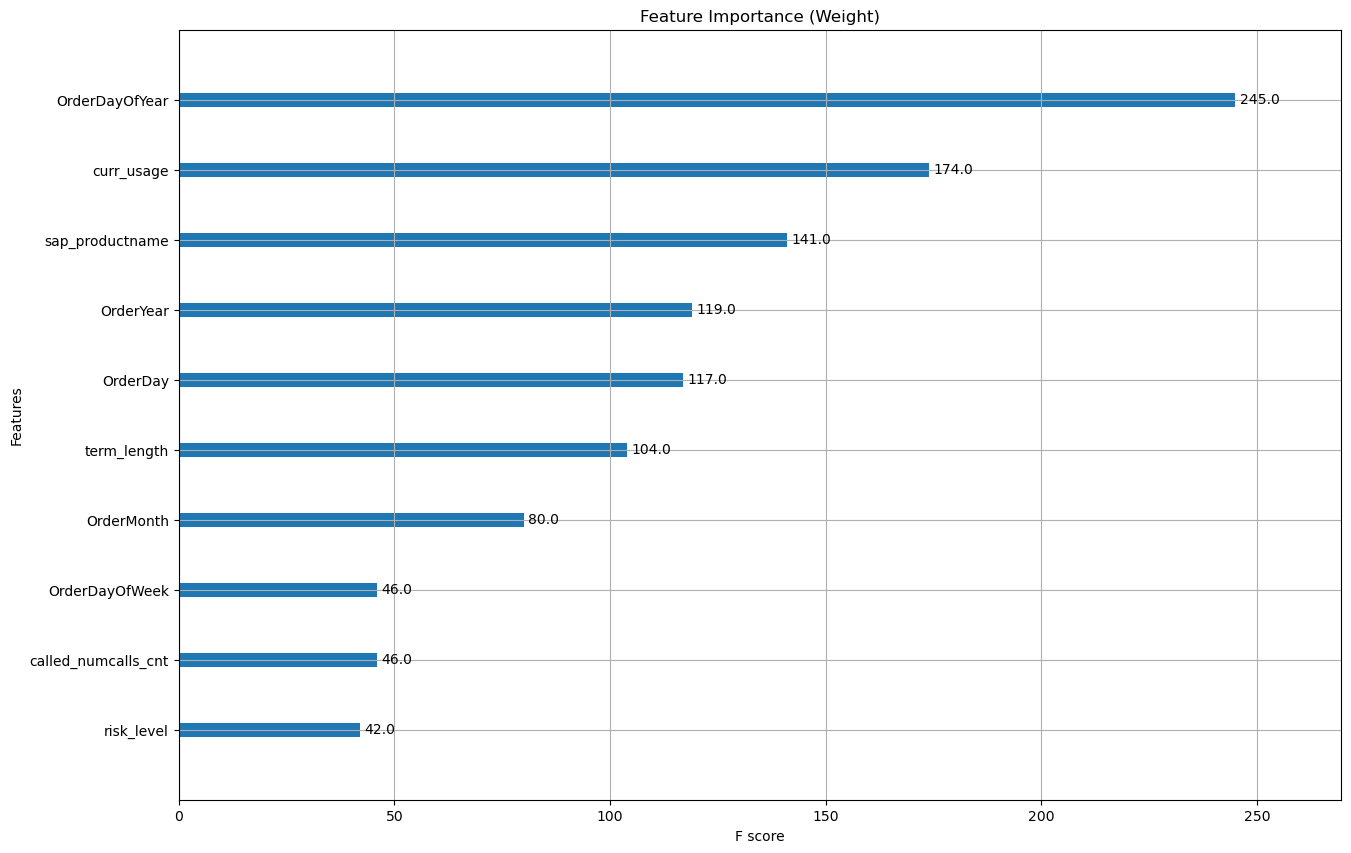

In [166]:
from xgboost import plot_importance
feature_name=X_train_dt.columns
fig,ax=plt.subplots(1,1,figsize=(15,10))
xgb.plot_importance(final_model, importance_type='weight', max_num_features=10,  title='Feature Importance (Weight)',ax=ax)
plt.show()

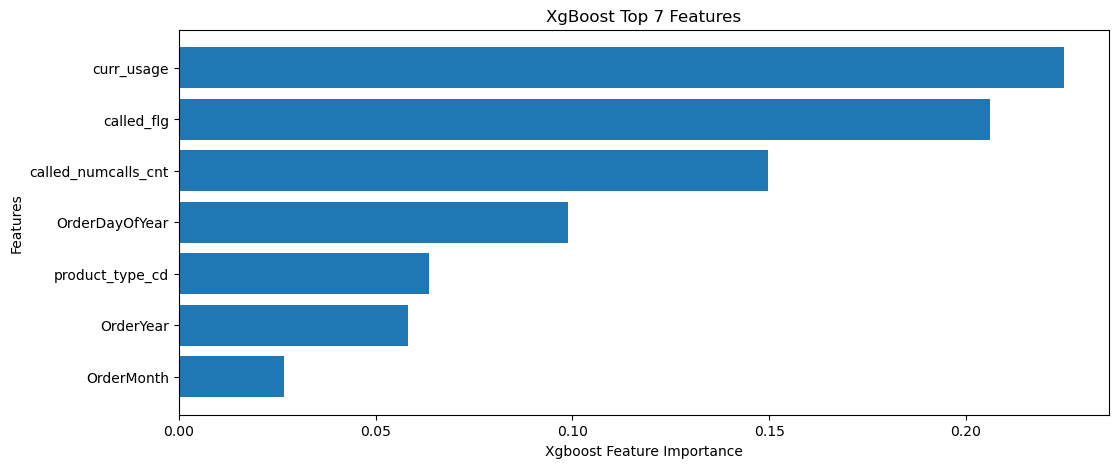

In [192]:
fig,ax=plt.subplots(1,1,figsize=(12,5))

sorted_idx = final_model.feature_importances_.argsort()
plt.barh(X_train_dt.columns[sorted_idx][26:], final_model.feature_importances_[sorted_idx][26:])
plt.xlabel("Xgboost Feature Importance")
plt.title('XgBoost Top 7 Features')
plt.ylabel('Features')
plt.show()

In [180]:
importance = final_model.feature_importances_
feature_names = X_train_dt.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
sorted_feature_importance_df.head()

,Feature,Importance
3,curr_usage,0.224970
20,called_flg,0.206072
2,called_numcalls_cnt,0.149690
9,OrderDayOfYear,0.098787
15,product_type_cd,0.063603


In [194]:
sorted_feature_importance_df.Feature.values

array(['curr_usage', 'called_flg', 'called_numcalls_cnt',
       'OrderDayOfYear', 'product_type_cd', 'OrderYear', 'OrderMonth',
       'numweblog_cnt', 'sap_productname', 'automatic_payment_flg',
       'term_length', 'OrderDay', 'OrderDayOfWeek', 'oam_flg',
       'disconotice_flg', 'risk_level', 'dma', 'oam_activelogin_cnt',
       'dwelling_type_cd', 'tos_flg', 'latefee_flg', 'city',
       'ebill_enroll_flag', 'deposit_onhand_amt', 'IsWeekend',
       'load_profile', 'tdsp', 'county', 'segment', 'disconnects_flg',
       'zipcode', 'weblog_flg', 'ev_driver'], dtype=object)

In [157]:
final_model.feature_importances_

array([0.00718279, 0.01296362, 0.14969003, 0.22496994, 0.00392067,
       0.01702111, 0.017255  , 0.05832339, 0.01178881, 0.09878681,
       0.00374047, 0.00509056, 0.00777695, 0.00506681, 0.00576427,
       0.0636033 , 0.0147321 , 0.        , 0.00738032, 0.00413713,
       0.20607157, 0.00861057, 0.00233433, 0.0035963 , 0.004811  ,
       0.        , 0.00333455, 0.00336906, 0.00732944, 0.        ,
       0.00312463, 0.02687487, 0.01134966], dtype=float32)

## Shap Values

In [164]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(final_model, X_train_dt)

# Calculate SHAP values for your data
shap_values = explainer.shap_values(X_train_dt)


 99%|===================| 64619/65052 [01:41<00:00]        

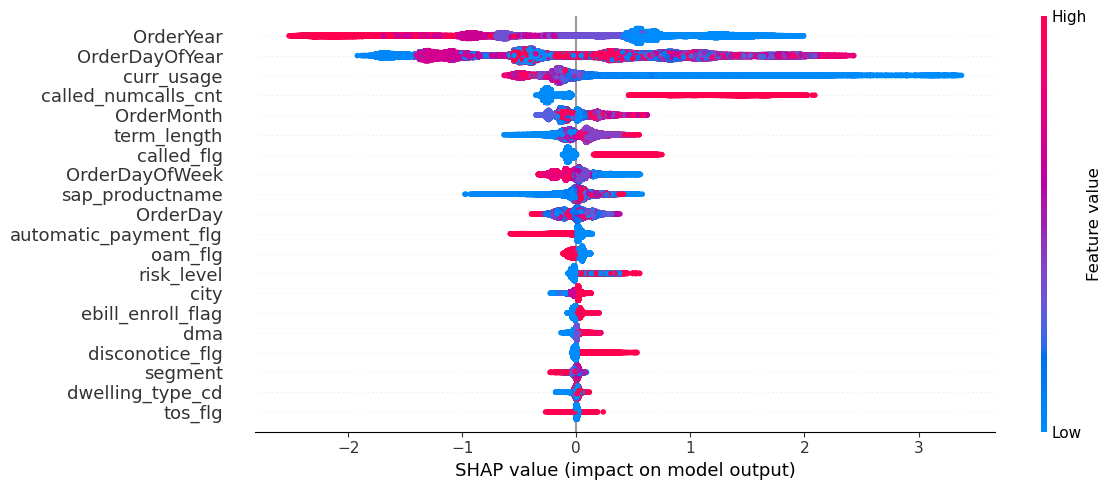

In [199]:

shap.summary_plot(shap_values, X_train_dt,plot_size=[12,5])


In [168]:
file_name = "ecoshare_xgb_v1.pkl"
# save
pickle.dump(final_model, open(file_name, "wb"))

In [173]:
# file_name = "rishabh_gupta_predictions.pkl"
# # save
# pickle.dump(final_model, open(file_name, "wb"))